## <font color='blue'> ASTR 21100</font>

## <font color='blue'> Homework Assignment 4</font>
    
## <font color='blue'> ITS sampling, implementing Differential Evolution algorithm and using it to estimate the mean density of matter and dark energy in our Universe</font>

## <font color='blue'> (24 points + 4 extra-credit points)</font>
    
### <font color='blue'> Distributed: Friday, January 25</font>

### <font color='blue'> Due: February, Feb 1, 10pm</font>

### Introduction

This homework assignment involves an exercise on using the inverse transform sampling (ITS, ex 1). The specific pdf for which you are asked to implement the ITS sampling is used in the MCMC algorithm of Goodman & Weare (2010). So the need to draw random numbers from this pdf arises in this algorithm. 

In exercise 2 you need to implement the differential evolution (DE) algorithm and test it using the Rosenbrock function. Exercise 3 is optional (extra-credit) and involves implementation and testing of the crossover stage of the DE algorithm. 

In exercise 4 you will apply the DE algorithm to find the values of $M_0$, $\Omega_{\rm m0}$ and $\Omega_\Lambda$ that describe the supernovae type Ia sample from hw 3 best by minimizing an "objective function" $\chi^2$ that computes the square of the weighted difference between predicted and observed apparent magnitudes of supernovae and thus depends on these parameters. 

We will discuss DE and its implementation in class on Tue, Jan 30. If you want to hold off on implementing DE until Tuesday, you can. Before you implement your own DE function, you can use the SciPy's `differential_evolution` function to do exercise 4. Thus, you can do most of exercise 1 and 4 before Tuesday. 

import packages needed by the codes below. Run this cell first before using these codes. 

In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# the following code make plots look better
def plot_prettier(dpi=150, fontsize=11, usetex=False): 
    '''
    Make plots look nicer compared to Matplotlib defaults
    Parameters: 
        dpi - int, "dots per inch" - controls resolution of PNG images that are produced
                by Matplotlib
        fontsize - int, font size to use overall
        usetex - bool, whether to use LaTeX to render fonds of axes labels 
                use False if you don't have LaTeX installed on your system
    '''
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    if usetex:
        plt.rc('text', usetex=usetex)
    else:
        plt.rcParams['mathtext.fontset'] = 'cm'
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plot_prettier()

### <font color='blue'>Exercise 1 (5 points): Using the inverse transform method</font>
    
to sample random numbers from the distribution $g(x)=A/\sqrt{x}$ for $x\in[1/a,a]$ where $a$ is a constant and $A$ is normalization constant.

**Task 1a (1 point).** Derive expression for the normalization constant $A$. 

**Task 1b (1 point).** Derive the expression for the cdf $P(x)$ and its inverse $x = P^{-1}(y)$, where $y$ is value in the range $[0,1]$. 

**Task 1c (3 points).** Assuming $a=2$ write code to draw random numbers using inverse transform method using the inverse cdf you derive to draw $10^6$ random numbers that follow pdf $g(x)$. Test your results by histogramming results and comparing the histogram to the analytic expression for $g(x)$ shown as a line. 

***Note:*** examples of how to do the steps required in the ITS method can be found in [Section 7.4](https://astro.uchicago.edu/~andrey/classes/a211w24/html/mc/sample1.html) of the notes and in the [05_mc_methods](https://drive.google.com/file/d/16Q2MG9bqu9DHbj7HEAEi70Tr9P25d1iS/view?usp=drive_link) notebook. In the latter notebook it is also shown how to compare histogram of the random numbers to the pdf from which they are supposed to be sampled using function `plot_pdf` that can be found in the [`codes/plotting.py` file](https://drive.google.com/file/d/189lPhb0tcVQKekzQ_X7nuYs-pkukPOum/view?usp=sharing).


**Task 1a (1 point).** Derive expression for the normalization constant 
$A = 1/(2(a^{1/2} - (1/a^{1/2}))$.

**Task 1b (1 point).** Derive the expression for the cdf $P(x)$ and its inverse $x = P^{-1}(y)$, where $y$ is value in the range $[0,1]$. 

**Task 1c (3 points).** Assuming $a=2$ write code to draw random numbers using inverse transform method using the inverse cdf you derive to draw $10^6$ random numbers that follow pdf $g(x)$. Test your results by histogramming results and comparing the histogram to the analytic expression for $g(x)$ shown as a line. 

***Note:*** examples of how to do the steps required in the ITS method can be found in [Section 7.4](https://astro.uchicago.edu/~andrey/classes/a211w24/html/mc/sample1.html) of the notes and in the [05_mc_methods](https://drive.google.com/file/d/16Q2MG9bqu9DHbj7HEAEi70Tr9P25d1iS/view?usp=drive_link) notebook. In the latter notebook it is also shown how to compare histogram of the random numbers to the pdf from which they are supposed to be sampled using function `plot_pdf` that can be found in the [`codes/plotting.py` file](https://drive.google.com/file/d/189lPhb0tcVQKekzQ_X7nuYs-pkukPOum/view?usp=sharing).

In [2]:
#---------> 1a
#A = 1./(2.*(a**(0.5) - (1./a)**(0.5)))
#----------> 1b
#y = 2*A*(x**0.5)
#x = y**2/(4*(A**2))
#----------> 1c

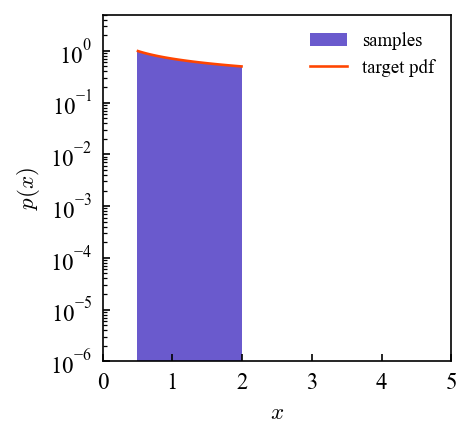

0.500000119082348 1.999999183987121


In [3]:
a = 2
A = 1./(2.*(a**(0.5) - (1./a)**(0.5)))
from codes.plotting import plot_pdf
def pdf1(x):
    
    return A/x**(0.5)

y = np.random.uniform(size=1000000)
x = ((y + (2*A*((1/a)**(0.5))))/(2*A)) ** 2.

plot_pdf(x, func=pdf1, args=[], xlims=[0,5], ylims=[1.e-6,5], 
          bins='auto', xlabel=r'$x$', ylabel=r'$p(x)$', figsize=3)
print (min(x), max(x))


### <font color='blue'>Exercise 2: implementing and testing  Differential Evolution algorithm for minimization (14 points)</font>

**Background.** Minimization in many dimensions is generally a complicated task. However, a class of <a href="https://en.wikipedia.org/wiki/Differential_evolution">Differential Evolution</a> (DE) algorithms developed from the initial ideas of R. Storn and K. Price in 1997 (<a href="https://link.springer.com/article/10.1023%2FA%3A1008202821328">Storn & Price 1997</a>), are relatively simple to implement, work in arbitrary number of dimensions, do not require function derivatives, allow imposing bounds on the domain, and are quite efficient in minimizing multi-dimensional functions.


The simplest version of the differential evolution algorithm described in [Section 7.3 of the notes]() can be presented as the following pseudo-code below. Here npop is the number of population members and x0 is an array of shape (npop, ndim) with initial location of the population members; ndim is the number of variables in the function <tt>func</tt> for which we need to find the values of arguments corresponding to the function minimum.   

    npop = np.size(x0)[0] # the number of population members
    xnow = np.copy(x0)
    fnow = np.empty(npop)
    for i in range(npop):
        fnow[i] = func(xnow[i])
    xnext = np.zeros_like(xnow)
    ....
    while some convergence criterion is not met: 
        # xnow is a vector of coordinate vectors of the current population
        # xnext is a vector of coordinate vector of the next gen population
        for i in range(npop):
            # generate random unique indices  ir1, ir2, ir3 
            # where all indices are not equal to each other and not equal to i
            # s can be a constant for large npop, but it's more safe to make it a
            # random number drawn from uniform distribution in the range [smin,1]
            xtry = xnow[ir3] + s * (xnow[ir1] - xnow[ir2])
            if (func(xtry) <= fnow[i]) and (xtry is within bounds):
                xnext[i] = xtry
                fnow[i] = func(xtry)
            else:
                xnext[i] = xnow[i]
                
        xnow = np.copy(xnext)

**Task 2a. (10 points)** Use pseudo-code of the DE algorithm above to implement the basic DE minimization function with the following interface:

    def minimize_de(func, x0, *args, atol=1.e-6, s=0.1, bounds=None):
        """
        Parameters:
        ------------
        func - Python function object
               function to minimize, should expect x0 as a parameter vector
        x0   - vector of real numbers of shape (npop, nd), 
                where npop is population size and nd is the number of func parameters
        args - tuple of floats, arguments to be passed to func
        atol - float
                absolute tolerance threshold for change of population member positions
        s    - float 
               s parameter for scaling steps, the step size will be dwarf from uniform distribution between s and 1
        bounds - array of tuples 
                bounds for the minimization exploration; define the region in which to search for the minimum
        """
               
Your function should be able to prevent steps and function evaluations outside the range of values for each argument of function `func` specified in the tuple `bounds` and should be able to find the values of the minimum with absolute accuracy better than input `atol` (at least for `atol > 1e-8`). 

***Note:*** guard against for the cases when the small number of population members is used when population does not move at a given mutation stage, so that this does not result in premature stopping of the algorithm. 

***Note:*** Try to remove the inner loops as much of the algorithm as possible. This code can be fully vectorized with only one loop for the mutations of the population. However, unless you are very comfortable with NumPy, try to implement a working version with loops first before trying to remove loops and speed up calculations in this function (which can be done after you are done with all of the exercises in this assignment). 


In [4]:
from scipy.optimize import differential_evolution

def minimize_de(func, *args, popsize=10, atol=1.e-6, s=0.1, bounds=None):
    """
    Parameters:
    ------------
    func - Python function object
           function to minimize, should expect x0 as a parameter vector
    x0   - vector of real numbers of shape (npop, nd), 
            where npop is population size and nd is the number of func parameters
    args - tuple of floats, arguments to be passed to func
    atol - float
            absolute tolerance threshold for change of population member positions
    s    - float 
           s parameter for scaling steps, the step size will be dwarf from uniform distribution between s and 1
    bounds - array of tuples 
            bounds for the minimization exploration; define the region in which to search for the minimum

            
    """
    
    res = differential_evolution(func, bounds=bounds, mutation=[s, 1.], recombination=0.7, 
                               atol=atol, tol=0., strategy='rand1bin',
                               popsize=popsize, polish=False)

    return res.x

In [5]:
#------------------------------>2a<------------------------------------->
from scipy.optimize import differential_evolution

def minimize_de(func, *args, popsize=10, atol=1.e-6, s=0.1, bounds=None):
    """
    Parameters:
    ------------
    func - Python function object
           function to minimize, should expect x0 as a parameter vector
    x0   - vector of real numbers of shape (npop, nd), 
            where npop is population size and nd is the number of func parameters
    args - tuple of floats, arguments to be passed to func
    atol - float
            absolute tolerance threshold for change of population member positions
    s    - float 
           s parameter for scaling steps, the step size will be dwarf from uniform distribution between s and 1
    bounds - array of tuples 
            bounds for the minimization exploration; define the region in which to search for the minimum

            
    """
    nd = np.shape(bounds)[0]
    npop = nd * popsize # the number of population members
    xnow = np.empty((npop,nd))
    fnow = np.empty(npop) 
    for i in range(nd):
        xmin,xmax = bounds[i,0], bounds[i,1]
        xnow[:,i] = xmin + (xmax - xmin)*np.random.uniform(0,1, size = npop)
    for i in range(npop):
        fnow[i] = func(xnow[i])
    xnext = np.zeros_like(xnow)
            #-------> mutation and selection stages
  #  .... insert code here??

    diff = 1 + atol
    
    while not (0 < diff < atol): 
        # xnow is a vector of coordinate vectors of the current population
        # xnext is a vector of coordinate vector of the next gen population
        ir = np.zeros((npop, npop-1)).astype(int)
        for i in range(npop):
            # generate random unique indices  ir1, ir2, ir3 
            # where all indices are not equal to each other and not equal to i
            # s can be a constant for large npop, but it's more safe to make it a
            # random number drawn from uniform distribution in the range [smin,1]
            inds = np.arange(npop)
            inds = np.delete(inds,i)
            np.random.shuffle(inds)
            sr = np.random.uniform(s,1)
            xtry = xnow[inds[0]] + sr * (xnow[inds[1]] - xnow[inds[2]])
            if ((bounds[:,0]<= xtry) & (xtry <= bounds[:,1])).all():
                if (func(xtry) <= fnow[i]): 
                    xnext[i] = xtry
                    fnow[i] = func(xtry)
                else:
                    xnext[i] = xnow[i]
                    #print(xnext[i])
            else:
                xnext[i] = xnow[i]
                #print(xnext[i])
        diff = abs(xnow-xnext).max()   
        
            #compute difference between new x values and the old
        xnow = np.copy(xnext)
        
    return np.median(xnow, axis=0)

In [6]:
'''npop = np.size(x0)[0] # the number of population members
xnow = np.copy(x0)
fnow = np.empty(npop)
for i in range(npop):
    fnow[i] = func(xnow[i])
xnext = np.zeros_like(xnow)
....
while some convergence criterion is not met: 
    # xnow is a vector of coordinate vectors of the current population
    # xnext is a vector of coordinate vector of the next gen population
    for i in range(npop):
        # generate random unique indices  ir1, ir2, ir3 
        # where all indices are not equal to each other and not equal to i
        # s can be a constant for large npop, but it's more safe to make it a
        # random number drawn from uniform distribution in the range [smin,1]
        xtry = xnow[ir3] + s * (xnow[ir1] - xnow[ir2])
        if (func(xtry) <= fnow[i]) and (xtry is within bounds):
            xnext[i] = xtry
            fnow[i] = func(xtry)
        else:
            xnext[i] = xnow[i]
            
    xnow = np.copy(xnext)'''

"npop = np.size(x0)[0] # the number of population members\nxnow = np.copy(x0)\nfnow = np.empty(npop)\nfor i in range(npop):\n    fnow[i] = func(xnow[i])\nxnext = np.zeros_like(xnow)\n....\nwhile some convergence criterion is not met: \n    # xnow is a vector of coordinate vectors of the current population\n    # xnext is a vector of coordinate vector of the next gen population\n    for i in range(npop):\n        # generate random unique indices  ir1, ir2, ir3 \n        # where all indices are not equal to each other and not equal to i\n        # s can be a constant for large npop, but it's more safe to make it a\n        # random number drawn from uniform distribution in the range [smin,1]\n        xtry = xnow[ir3] + s * (xnow[ir1] - xnow[ir2])\n        if (func(xtry) <= fnow[i]) and (xtry is within bounds):\n            xnext[i] = xtry\n            fnow[i] = func(xtry)\n        else:\n            xnext[i] = xnow[i]\n            \n    xnow = np.copy(xnext)"

In [7]:
'''atol = 1.e-6
diff = 1.e-8

#diff >= atol

not (0 < diff < atol) is True'''


'atol = 1.e-6\ndiff = 1.e-8\n\n#diff >= atol\n\nnot (0 < diff < atol) is True'

In [8]:
npop = 10
i = 5
inds = np.arange(npop)
inds = np.delete(inds,i)
ir = np.random.choice(inds)
print(ir,np.arange(npop))
print(np.delete(inds,i))

8 [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 7 8 9]


***Note:*** Assuming that we are searching for a minimum within some rectangular domain defined by the minimum and maximum values along each coordinate axis: $\mathbf{x}_{\rm min}$ and $\mathbf{x}_{\rm max}$, we can initialize the population members as 

$$\mathbf{x}_0 = \mathbf{x}_{\rm min} + (\mathbf{x}_{\rm max}-\mathbf{x}_{\rm min}) \cdot\mathrm{rand}(0,1),$$

where $\mathrm{rand}(0,1)$ is a random number uniformly distributed from 0 to 1, generated using <tt>np.random.uniform</tt>.  


***2b (4 points).*** Test your implementation using Rosenbrock function implemented below in 2- and 5-dimensions. Try different number of population members and $s$ values and choices for how $s$ is chosen and examine how results change and for what number of population members the algorithm returns correct minimum value reliably ($[1,1]$ in 2D and $[1, 1, 1, 1, 1]$ in 5D). 


* Present a brief discussion of how large population should be in 2D and 5D to get correct minimum reliably. 


* Experiment with different values of the $s$ parameter and present a brief discussion of how choices of $s$ affect results 


* Demonstrate that your function returns values within the specified `atol` value reliably in 5D. 


* Compare the time it takes your function to find the minimum and how well it can find the minimum using 30 and $\geq 60$ population members. Compare your results with the SciPy's `differential_evolution` function (example of how to use it is shown below). 

The two versions of the Rosenbrock 

In [9]:
def rosenbrock(x):
    """The Rosenbrock "banana" function
    x is a vector of points in 2 or more dimensional space
    In this function x is an array of shape (ndim) containing 
    values of ndim function arguments. 
    
    Returns: 
        float, value of the ndim-dimensional Rosenbrock function for input x
    """
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


The Rosenbrock function below is modified to handle vector input of the shape (ndim, npop)

In [10]:
def rosenbrock_v(x):
    """Compute the Rosenbrock "banana" function
    In this function the input x is expected to have shape (ndim, npop) and contain 
    values of ndim arguments of the function for npop population members.
    This shape allows to arrange calculations in the DE algorithm that avoid inner loops
    
    Returns:
        array of shape (npop) with values of the Rosenbrock function for the 
        locations of each population member
    """
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0).T


Code below is an example of how SciPy's [`differential_evolution`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html) function can be used to estimate the minimum of the 5-D Rosenbrock function and how one can time the time it takes for that function to find the minimum. 

`mutation` argument of `differential_evolution` determines the range from which random scaling parameter will be 
drawn from the uniform distribution defined on the interval $[s,1]$. `recombination` argument determines the recombination probability `cr` in the crossover stage of the algorithm; `recombination=1.` corresponds to no crossover stage. Description of other parameters can be found in the description of the function at the link above. Keep `polish=False` in comparisons with your function because in this case the SciPy function does a pure DE minimzation. 


Without crossover stage (results are unstable, but can be made stable by increasing npop to >=10):

In [11]:
from scipy.optimize import differential_evolution
from time import time
# the total number of pop members will be popsize*5
popsize = 10
args = []
bounds = np.array([(-15, 15), (-10, 10), (-9,9), 
                   (-8, 8), (-9.5, 9.5)])

s = 0.2
tstart = time()
res = differential_evolution(rosenbrock, bounds=bounds, mutation=[s, 1.], recombination=1., 
                               atol=1.e-8, tol=0., strategy='rand1bin',
                               popsize=popsize, polish=False)
print(f"completed in {(time() - tstart):.3g} sec")
print("found minimum at:", res.x)
print(f"in {res.nfev:d} function evaluations")
print(40*'-')

completed in 0.365 sec
found minimum at: [0.99999928 0.99999634 0.99999323 0.99998085 0.99996275]
in 15150 function evaluations
----------------------------------------


In [12]:
from scipy.optimize import differential_evolution
from time import time
# the total number of pop members will be popsize*5
popsize = 10
args = []
bounds = np.array([(-15, 15), (-10, 10)])

s = 0.5
tstart = time()
x = minimize_de(rosenbrock, bounds=bounds, atol=1.e-6, popsize=popsize, s = 0.5)
print(f"completed in {(time() - tstart):.3g} sec")
print("found minimum at:", x)
print(f"in {res.nfev:d} function evaluations")
print(40*'-')

completed in 0.0329 sec
found minimum at: [1.00000002 1.00000003]
in 15150 function evaluations
----------------------------------------


In [13]:
from scipy.optimize import differential_evolution
from time import time
# the total number of pop members will be popsize*5
popsize = 5

bounds = np.array([(-15, 15), (-10, 10), (-9,9), 
                   (-8, 8), (-9.5, 9.5)])

s = 0.2
tstart = time()
x = minimize_de(rosenbrock, bounds=bounds, atol=1.e-6, popsize=popsize, s=s)
print(f"completed in {(time() - tstart):.3g} sec")
print("found minimum at:", x)
print(f"in {res.nfev:d} function evaluations")
print(40*'-')

completed in 0.111 sec
found minimum at: [-0.96206062  0.93576348  0.88076006  0.77795746  0.60521737]
in 15150 function evaluations
----------------------------------------


With crossover stage (results are stable even with npop=5):

In [14]:
from scipy.optimize import differential_evolution

# the total number of pop members will be popsize*5
popsize = 6

bounds = np.array([(-15, 15), (-10, 10), (-9,9), 
                   (-8, 8), (-9.5, 9.5)])

s = 0.2
tstart = time()
res = differential_evolution(rosenbrock, bounds=bounds, mutation=[s, 1.], recombination=0.5, 
                               atol=1.e-8, tol=0., strategy='rand1bin',
                               popsize=popsize, polish=False)
print(f"completed in {(time() - tstart):.3g} sec")
print("found minimum at:", res.x)
print(f"in {res.nfev:d} function evaluations")
print(40*'-')

completed in 0.701 sec
found minimum at: [0.99966517 0.99938893 0.99892849 0.99780663 0.99560086]
in 30030 function evaluations
----------------------------------------


### <font color='blue'>Exercise 3 (4 points): Implementing the crossover stage of the DE algorithm</font>



**Background**. One of the modifications to the basic DE algorithm is introduction of the ***crossover stage*** after the mutation that constructs the proposed location $\mathbf{x}^\prime$.

The cross-over stage of the algorithm is described below and can be added after the mutation stage. This stage incorporates information about the current location of the population member into the process of construction of the new proposed location. 
This way the construction of the proposed location incorporates information about location of 4 population member (the current one and 3 other randomly chosen ones) instead of 3 members as in the basic version without the crossover stage. 
The crossover stage can stabilize performance of the algorithm and allow stable results to be achieved with fewer population members. 

The mutation and crossover stages together can be described as follows: 

* compute mutation vector $\mathbf{x}^\prime_i=\mathbf{x}_{{\rm now}, r_3} + s\,(\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1})$, as before, where vector $\mathbf{x}^\prime_i$ has components $\mathbf{x}^\prime_i=[x^{\prime}_{0i}, x^{\prime}_{1i}, \ldots, x^{\prime}_{(D-1)i}]$, and $D$ is the number of parameters of the minimized function (i.e., the number of dimensions in which the algorithm is searching for the minimum). 

* "***crossover stage***": form the trial vector $\mathbf{x}^{\prime\prime}_i=[x^{\prime\prime}_{0i}, x^{\prime\prime}_{1i}, \ldots, x^{\prime\prime}_{(D-1)i}]$, where 

\begin{equation}
x^{\prime\prime}_{ji} = 
\begin{cases}
x^{\prime}_{ji}, \ {\rm if\ }r_j\leq \mathrm{cr},\\
x_{{\rm now},ji}, \ {\rm otherwise\ }
\end{cases}
\end{equation}

and $r_j$ is the random floating point number uniformly distributed in the interval $[0,1]$ that is generated for the index $j$. The crossover parameter $\mathrm{cr}\in (0,1]$ is a constant set by user and can be a keyword argument of the DE function. Note that $\mathrm{cr}\geq 1$ corresponds to no crossover stage and for $cr=0.$ members will not move from their initial locations. 

**Task 3a. (3 points)** Implement the crossover stage and test your implementation using the Rosenbrock pdf in 5 dimensions. 


**Task 3b. (1 points)** Test stability of the DE minimization for 30 population members and 5D Rosenbrock pdf with and without crossover stage. Note that correctly implemented crossover stage should result in shorter time to find the minimum and much improved stability for this test case and number of members.  


If you implement the crossover stage it makes sense to add arguments to your DE function that can switch it off and on and change the value of the recombination probability `cr`. For example:

    def minimize_de(func, x0, *args, atol=1.e-6, s=0.1, cr=0.7, 
                    crossover=True, bounds=None):
        """
        Parameters:
        ------------
        func - Python function object
               function to minimize, should expect x0 as a parameter vector
        x0   - vector of real numbers of shape (npop, nd), 
                where npop is population size and nd is the number of func parameters
        args - tuple of floats, arguments to be passed to func
        atol - float, absolute tolerance threshold for the median change of 
                population member positions, default is 1.e-6
        s    - float, s parameter for scaling steps, the step size will be drawn from 
               the uniform distribution between s and 1. Default is 0.1 
        cr   - float, recombination probability for the crossover stage. 
               Default is 0.7
        crossover - bool, use crossover stage if True. Default is True.
        bounds - array of tuples 
                bounds for the minimization exploration; define the region in which to search for the minimum
        """


### <font color='blue'>Exercise 4 (5 points): Implementing the $\chi^2$ function  and finding parameter values that minimize $\chi^2$ function of supernovae type Ia magnitudes data given model parameters</font>

### Background: supernovae type Ia as cosmological lighthouses and probes

The *apparent magnitude* of a source of [absolute magnitude](https://astronomy.swin.edu.au/cosmos/a/Absolute+Magnitude) $M$ predicted by a cosmology model with a given values of $H_0$, $\Omega_{\rm m0}$, $\Omega_\Lambda$ is 

$$m= M +5\log_{10}d_L(z,\Omega_{\rm m0},\Omega_\Lambda) + 25.$$

Here $d_L$ can be computed using the function that was implemented in homework 3 or the corresponding AstroPy function. 

Supernovae type Ia that result from a thermonuclear explosion of a white dwarf star occur, their peak luminosity can comparable to luminosity of their entire host galaxy. Such supernovae can be observed and their apparent magnitude at peak brightness, $m_{\rm SNIa}$, and redshift, $z$, can be measured. If we assume that all such supernovae have the same *intrinsic* luminosity at peak brightness corresponding to the absolute magnitude at peak brightness, $M_0$, we can predict the magnitude using equation for $m$ above and assuming some values for $M_0$, $H_0$, $\Omega_{\rm m0}$, $\Omega_\Lambda$. 

A difference between the measured, $m_{\rm obs}$, and model prediction $m_{\rm pred}$ can thus be written as 
$$
\Delta m=m_{\rm obs} - m_{\rm pred} =m_{\rm obs} - M_0 - 5\log_{10}d_L(z,\Omega_{\rm m0},\Omega_\Lambda)- 25.
$$

The best-fit parameters $M_0$, $\Omega_{\rm m0}$, and $\Omega_\Lambda$ can be determine by finding the minimum of the $\chi^2$ function: 

$$\chi^2 = \sum\limits_{i=0}^{N_{\rm SN}-1}\frac{ (m_{i,\rm obs}-m_{\rm i,\rm pred})^2}{\sigma_{m_i}^2},$$

where $N_{\rm SN}$ is the number of supernovae type Ia in the sample and $\sigma_{m_i}$ is uncertainty of the apparent magnitude measurement $m_{i,\rm obs}$.

Parameter $M_0$ tells us what the intrinsic luminosity of the supernovae type Ia is, while $\Omega_{\rm m0}$ and $\Omega_\Lambda$ characterize the mean density of matter and dark energy in the Universe. So by determing their best-fit values for the supernova measurements we are learning about what our Universe is made of. 

***Note:*** The sum in the equation for $\chi^2$ above can be efficiently computing using NumPy function `np.sum` if $m_{\rm pred}$ and $m_{i,\rm obs}$ are arrays. You can use the `d_l_astropy` function from hw 3 to compute $d_L$ and $m_{\rm pred}$. This function allows you to compute distances for an array of redshifts in a single call. 


***Note*** that $d_L$ is proportional to $c/H_0$, which means that we can write $\log_{10}d_L = \log_{10}(c/H_0)\tilde{d}_L = \log_{10}(c/H_0) + \log_{10}\tilde{d}_L$. At the same time $\log_{10}(c/H_0)=\log_{10}c - \log_{10}H_0$. So we cannot independently determine $M_0$ and $H_0$ because they enter the above equation as a linear combination $-M_0 + 5\log_{10}H_0$ and we can only determine this combination, not $M_0$ and $H_0$ separately. Alternatively, we can fix $H_0$ to say $70$ km/s/Mpc and only $M_0$ is determined from the data. 

### Tasks

**4a. (3 points)** Implement a function that computes the $\chi^2$ function above using the supernovae data that is read by the code below. You can pass this data via `*args` to the $\chi^2$ function. Use your differential function, implemented and tested in exercise 2, to derive the values of $M_0$, $\Omega_{\rm m0}$, and $\Omega_\Lambda$ that minimize $\chi^2$. Print our these values and the minimum value of $\chi^2$ itself.  

**4b. (1 point)** Make sure that minimization results make sense. Use Matplotlib to overplot $m_{\rm pred}(z)$ for a grid of $z$ values as a line over $m_{\rm obs}$ and $z$ measurements plotted as a scatter plot using the supernovae type Ia data that is read below. Make sure that the line goes close to the points.

**4c. (1 point)** A model is considered to be a good fit to the data, if $\chi^2/(N_{\rm data}-N_{\rm param})$, where $N_{\rm data}$ is the number of measurments used ($=740$ here) and $N_{\rm params}$ is the number of model parameters ($=3$ here) is close to 1.0 (say it is $\approx 1\pm 0.5$). Based on this, briefly discuss whether the model with the best-fit values of parameters you derived is a good fit to the data according to this criterion. 


In [15]:
# d_L function from Astropy for testing
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_l_astropy(z, H0, om0, oml):
    cosmo = LambdaCDM(H0=H0, Om0=om0, Ode0=oml)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [16]:
#zsn, msn, emsn are redshift of SNia, its apparent B-band magnitude, and emsn is magnitude error
zsn, msn, emsn = np.loadtxt('https://astro.uchicago.edu/~andrey/classes/a211/data/jla_lcparams.txt', 
                                               usecols=(1, 4, 5), unpack=True)

print("read sample of %d supernovae..."%(np.size(zsn)))

read sample of 740 supernovae...


In [17]:
#x[0] = M0, x[1] = om0, x[2] = oml
H0 = 70
def chi_square(x, *args):
    mean = np.mean(msn)
    mpred = x[0] + 5*(np.log10(d_l_astropy(zsn, H0, x[1], x[2]))) + 25 
    diff = msn - mpred
    chi_sq = np.sum(diff**2/(emsn)**2)
    return chi_sq
#x is array of parameters that your function depends on
#--> 3 values

In [18]:
bounds = np.array([(-23,-15),(0,1),(0,1)])
args = [zsn, msn, emsn]
minima = minimize_de(chi_square, *args, popsize=20, atol=1.e-4, s=0.2, bounds=bounds)
print(minima)
#use de function to derive values of M0, om0, oml
#the bounds array --> min and max for each parameter

[-19.05027108   0.37478671   0.32218532]


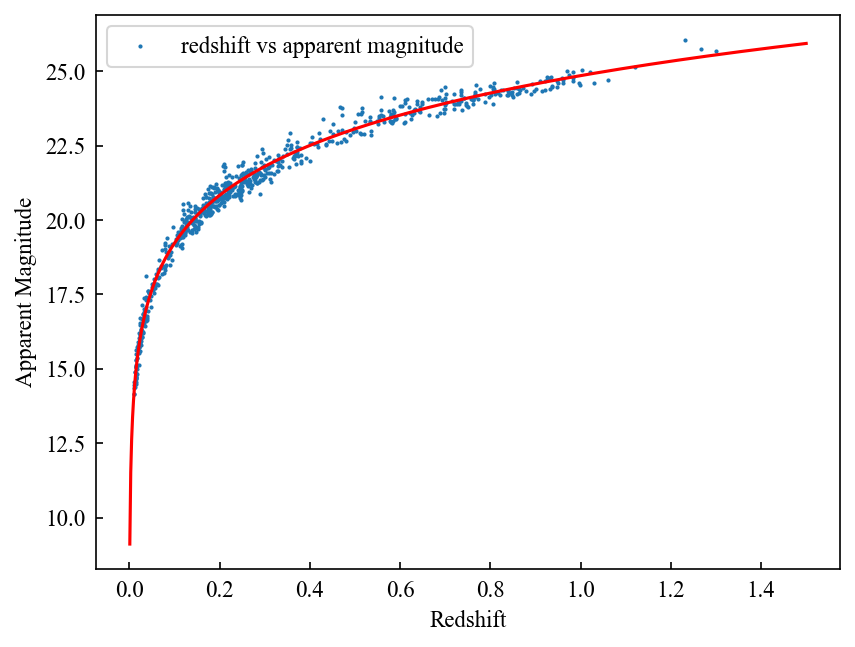

In [19]:

z = np.linspace(0.001,1.5,740)
mp = np.array([])
H0 = 70.
Om0 = minima[1]
Oml = minima[2]
for i, r in enumerate (z):
    abs_mag = minima[0]
    mpred = abs_mag + 5*(np.log10(d_l_astropy(r, H0, Om0, Oml))) + 25
    mp = np.append(mp, mpred)

plt.scatter(zsn, msn, s = 1)
plt.plot(z, mp, color = 'r')
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.legend(["redshift vs apparent magnitude"])
plt.show()




In [20]:
#-----------------------------> 4a
cs = chi_square(minima, *args)
args = [zsn, msn, emsn]
f = cs/(740 -3)
print("reduced Chi Squared:", f)
#This is not a good model, ideally this value would be closer to 1. 
#The number is probably so high because we assume that the absolute magnitude is the same for every supernova in the sample

reduced Chi Squared: 6.212471238966938
